submitted by Tarang Ranpara (202011057)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 1.7MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# importing essential libs
import os 
import re
import nltk
import pickle
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import LinearSVC
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support

# downloading essentials
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Data Loading and Preprocesssing

In [ ]:
dir = './drive/MyDrive/IRLAB/A7/'

train = pd.read_csv(os.path.join(dir, 'train.csv'))
test = pd.read_csv(os.path.join(dir, 'test.csv'))
test_labels = pd.read_csv(os.path.join(dir, 'test_labels.csv'))

In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [ ]:
train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
lengths = train['comment_text'].str.len()

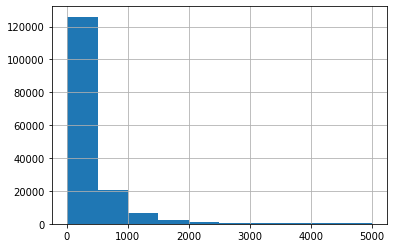

In [ ]:
lengths.hist()

In [ ]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# for those comments who don't have lables
train['none'] = 1-train[label_cols].max(axis=1)
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train["comment_text"].fillna("unknown", inplace=True)
test["comment_text"].fillna("unknown", inplace=True)

In [ ]:
stopwords = set(nltk.corpus.stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()
def preprocess(doc):
  global stopwords
  global lemmatizer

  doc = doc.lower()
  doc = re.sub(r'[^a-zA-Z\s]', '', doc)
  doc = nltk.tokenize.word_tokenize(doc)
  doc = [token for token in doc if token not in stopwords]
  doc = [lemmatizer.lemmatize(token) for token in doc]

  return ' '.join(doc)

In [ ]:
train_comments = list(map(preprocess, train['comment_text']))

In [ ]:
train_comments[0]

'explanation edits made username hardcore metallica fan reverted werent vandalism closure gas voted new york doll fac please dont remove template talk page since im retired'

Training TF-IDF Vectorizer

In [ ]:
vectorizer = TfidfVectorizer()
corpus_tf_idf = vectorizer.fit_transform(train_comments)

Training SVM Model for each class, and making predictions 

In [ ]:
toxic_clf = svm.SVC()
severe_toxic_clf = svm.SVC()
obscene_clf = svm.SVC()
threat_clf = svm.SVC()
insult_clf = svm.SVC()
identity_hate_clf = svm.SVC()

In [ ]:
toxic_clf.fit(corpus_tf_idf, train['toxic'])
pickle.dump(toxic_clf, open('./drive/MyDrive/IRLAB/A7/toxic_clf', 'wb'))

In [ ]:
severe_toxic_clf.fit(corpus_tf_idf, train['severe_toxic'])
pickle.dump(severe_toxic_clf, open('./drive/MyDrive/IRLAB/A7/severe_toxic_clf', 'wb'))

In [ ]:
obscene_clf.fit(corpus_tf_idf, train['obscene'])
pickle.dump(obscene_clf, open('./drive/MyDrive/IRLAB/A7/obscene_clf', 'wb'))

In [ ]:
threat_clf.fit(corpus_tf_idf, train['threat'])
pickle.dump(threat_clf, open('./drive/MyDrive/IRLAB/A7/threat_clf', 'wb'))

In [ ]:
insult_clf.fit(corpus_tf_idf, train['insult'])
pickle.dump(insult_clf, open('./drive/MyDrive/IRLAB/A7/insult_clf', 'wb'))

In [ ]:
identity_hate_clf.fit(corpus_tf_idf, train['identity_hate'])
pickle.dump(identity_hate_clf, open('./drive/MyDrive/IRLAB/A7/identity_hate_clf', 'wb'))

In [ ]:
pickle.dump(corpus_tf_idf, open('./drive/MyDrive/IRLAB/A7/corpus_tf_idf', 'wb'))
pickle.dump(test_tf_idf, open('./drive/MyDrive/IRLAB/A7/test_tf_idf', 'wb'))
pickle.dump(vectorizer, open('./drive/MyDrive/IRLAB/A7/vectorizer', 'wb'))

In [ ]:
toxic_clf = pickle.load(open('./drive/MyDrive/IRLAB/A7/toxic_clf', 'rb'))
severe_toxic_clf = pickle.load(open('./drive/MyDrive/IRLAB/A7/severe_toxic_clf', 'rb'))
obscene_clf = pickle.load(open('./drive/MyDrive/IRLAB/A7/obscene_clf', 'rb'))
threat_clf = pickle.load(open('./drive/MyDrive/IRLAB/A7/threat_clf', 'rb'))
insult_clf = pickle.load(open('./drive/MyDrive/IRLAB/A7/insult_clf', 'rb'))
identity_hate_clf = pickle.load(open('./drive/MyDrive/IRLAB/A7/identity_hate_clf', 'rb'))

In [ ]:
corpus_tf_idf = pickle.load(open('./drive/MyDrive/IRLAB/A7/corpus_tf_idf', 'rb'))
vectorizer = pickle.load(open('./drive/MyDrive/IRLAB/A7/vectorizer', 'rb'))

In [ ]:
test_labels_new = test_labels[
            test_labels['toxic'].isin([0,1]) & test_labels['severe_toxic'].isin([0,1]) & 
            test_labels['obscene'].isin([0,1]) & test_labels['threat'].isin([0,1]) & 
            test_labels['insult'].isin([0,1]) & test_labels['identity_hate'].isin([0,1])
]

In [ ]:
test_new = test[test['id'].isin(list(test_labels_new['id']))]

In [ ]:
test_labels_new

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,0,0,0,0,0,0
...,...,...,...,...,...,...,...
153150,fff8f64043129fa2,0,0,0,0,0,0
153151,fff9d70fe0722906,0,0,0,0,0,0
153154,fffa8a11c4378854,0,0,0,0,0,0
153155,fffac2a094c8e0e2,1,0,1,0,1,0


In [ ]:
test_new

,id,comment_text
5,0001ea8717f6de06,Thank you for understanding. I think very high...
7,000247e83dcc1211,:Dear god this site is horrible.
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig..."
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ..."
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l..."
...,...,...
153150,fff8f64043129fa2,":Jerome, I see you never got around to this…! ..."
153151,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...
153154,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...
153155,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...


In [ ]:
new_testset = pd.merge(test_new, test_labels_new, on="id", how="inner")
pickle.dump(new_testset, open('./drive/MyDrive/IRLAB/A7/new_testset', 'wb'))

In [ ]:
test_tf_idf = vectorizer.transform(new_testset['comment_text'])

In [ ]:
toxic_pred = toxic_clf.predict(test_tf_idf)
severe_toxic_pred = severe_toxic_clf.predict(test_tf_idf)
obscene_pred = obscene_clf.predict(test_tf_idf)
threat_pred = threat_clf.predict(test_tf_idf)
insult_pred = insult_clf.predict(test_tf_idf)
identity_hate_pred = identity_hate_clf.predict(test_tf_idf)

In [ ]:
pickle.dump(toxic_pred, open('./drive/MyDrive/IRLAB/A7/toxic_pred', 'wb'))
pickle.dump(severe_toxic_pred, open('./drive/MyDrive/IRLAB/A7/severe_toxic_pred', 'wb'))
pickle.dump(obscene_pred, open('./drive/MyDrive/IRLAB/A7/obscene_pred', 'wb'))
pickle.dump(threat_pred, open('./drive/MyDrive/IRLAB/A7/threat_pred', 'wb'))
pickle.dump(insult_pred, open('./drive/MyDrive/IRLAB/A7/insult_pred', 'wb'))
pickle.dump(identity_hate_pred, open('./drive/MyDrive/IRLAB/A7/identity_hate_pred', 'wb'))

In [ ]:
test_pred = pd.DataFrame(dict({
        'toxic': toxic_pred, 
        'severe_toxic': severe_toxic_pred, 
        'obscene': obscene_pred, 
        'threat': threat_pred, 
        'insult':insult_pred, 
        'identity_hate':identity_hate_pred
}))

In [ ]:
test_pred

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
63973,0,0,0,0,0,0
63974,0,0,0,0,0,0
63975,0,0,0,0,0,0
63976,1,0,1,0,1,0


In [ ]:
pickle.dump(test_pred, open('./drive/MyDrive/IRLAB/A7/test_pred', 'wb'))

# **Measuring Performance - TFIDF**

In [ ]:
print('class: Toxic')
print('Macro: ', precision_recall_fscore_support(new_testset['toxic'], test_pred['toxic'], average="macro"))
print('Micro: ', precision_recall_fscore_support(new_testset['toxic'], test_pred['toxic'], average="micro"))

class: Toxic
Macro:  (0.7181754697058831, 0.7836181622674803, 0.7445482966656226, None)
Micro:  (0.8985119884960455, 0.8985119884960455, 0.8985119884960455, None)


In [ ]:
print('class: severe_toxic')
print('Macro: ', precision_recall_fscore_support(new_testset['severe_toxic'], test_pred['severe_toxic'], average="macro"))
print('Micro: ', precision_recall_fscore_support(new_testset['severe_toxic'], test_pred['severe_toxic'], average="micro"))

class: severe_toxic
Macro:  (0.7346363419168487, 0.537903470416685, 0.5642770604651985, None)
Micro:  (0.9942167620119416, 0.9942167620119416, 0.9942167620119416, None)


In [ ]:
print('class: obscene')
print('Macro: ', precision_recall_fscore_support(new_testset['obscene'], test_pred['obscene'], average="macro"))
print('Micro: ', precision_recall_fscore_support(new_testset['obscene'], test_pred['obscene'], average="micro"))

class: obscene
Macro:  (0.6832093092622088, 0.7606591566160523, 0.7132338459871861, None)
Micro:  (0.9242552127293757, 0.9242552127293757, 0.9242552127293757, None)


In [ ]:
print('class: threat')
print('Macro: ', precision_recall_fscore_support(new_testset['threat'], test_pred['threat'], average="macro"))
print('Micro: ', precision_recall_fscore_support(new_testset['threat'], test_pred['threat'], average="micro"))

class: threat
Macro:  (0.6758555598209606, 0.5259095297847161, 0.5445932459885511, None)
Micro:  (0.9965613179530464, 0.9965613179530464, 0.9965613179530464, None)


In [ ]:
print('class: insult')
print('Macro: ', precision_recall_fscore_support(new_testset['insult'], test_pred['insult'], average="macro"))
print('Micro: ', precision_recall_fscore_support(new_testset['insult'], test_pred['insult'], average="micro"))

class: insult
Macro:  (0.8149711382733564, 0.7163157303840946, 0.7551402201898303, None)
Micro:  (0.9580480790271656, 0.9580480790271656, 0.9580480790271656, None)


In [ ]:
print('class: identity_hate')
print('Macro: ', precision_recall_fscore_support(new_testset['identity_hate'], test_pred['identity_hate'], average="macro"))
print('Micro: ', precision_recall_fscore_support(new_testset['identity_hate'], test_pred['identity_hate'], average="micro"))

class: identity_hate
Macro:  (0.9032234037555009, 0.5714474412832282, 0.6193740062545746, None)
Micro:  (0.9901059739285379, 0.9901059739285379, 0.9901059739285379, None)


Training Word2Vec Model

In [ ]:
word2vec_model = Word2Vec(sentences=train_comments, size=40, window=5, min_count=1, workers=4, sg=1)

In [ ]:
# generating embedding for given list of sentences 
def gen_embedding(lst):
  result = []
  for sentence in lst:
    vector = np.zeros((40,))
    words = sentence.split()
    count = 0
    for word in words:
      try:
        vector += word2vec_model.wv.get_vector(word)
        count += 1
      except:
        pass
    
    if count > 0:
      result.append(vector/count)
    else:
      result.append(vector)
  return result

In [ ]:
train_embeddings = gen_embedding(train_comments)

In [ ]:
new_testset = pickle.load(open('./drive/MyDrive/IRLAB/A7/new_testset', 'rb'))
new_testset

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
63973,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
63974,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
63975,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
63976,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [ ]:
test_embeddings = gen_embedding(new_testset['comment_text'])

In [ ]:
toxic_wv_clf = svm.LinearSVC()
severe_wv_toxic_clf = svm.LinearSVC()
obscene_wv_clf = svm.LinearSVC()
threat_wv_clf = svm.LinearSVC()
insult_wv_clf = svm.LinearSVC()
identity_wv_hate_clf = svm.LinearSVC()

In [ ]:
toxic_wv_clf.fit(train_embeddings, train['toxic'])
severe_wv_toxic_clf.fit(train_embeddings, train['severe_toxic'])
obscene_wv_clf.fit(train_embeddings, train['obscene'])
threat_wv_clf.fit(train_embeddings, train['threat'])
insult_wv_clf.fit(train_embeddings, train['insult'])
identity_wv_hate_clf.fit(train_embeddings, train['identity_hate'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
toxic_wv_clf_pred = toxic_wv_clf.predict(test_embeddings)
severe_wv_toxic_clf_pred = severe_wv_toxic_clf.predict(test_embeddings)
obscene_wv_clf_pred = obscene_wv_clf.predict(test_embeddings)
threat_wv_clf_pred = threat_wv_clf.predict(test_embeddings)
insult_wv_clf_pred = insult_wv_clf.predict(test_embeddings)
identity_wv_hate_clf_pred = insult_wv_clf.predict(test_embeddings)

In [ ]:
test_pred_wv = pd.DataFrame(dict({
        'toxic': toxic_wv_clf_pred, 
        'severe_toxic': severe_wv_toxic_clf_pred, 
        'obscene': obscene_wv_clf_pred, 
        'threat': threat_wv_clf_pred, 
        'insult':insult_wv_clf_pred, 
        'identity_hate':identity_wv_hate_clf_pred
}))

In [ ]:
test_pred_wv

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
63973,0,0,0,0,0,0
63974,0,0,0,0,0,0
63975,0,0,0,0,0,0
63976,0,0,0,0,0,0


# **Measuring Performance - word2vec**

In [ ]:
print('class: Toxic')
print('Macro: ', precision_recall_fscore_support(new_testset['toxic'], test_pred_wv['toxic'], average="macro", warn_for = tuple()))
print('Micro: ', precision_recall_fscore_support(new_testset['toxic'], test_pred_wv['toxic'], average="micro", warn_for = tuple()))

class: Toxic
Macro:  (0.45240551439557347, 0.5, 0.47501353946137564, None)
Micro:  (0.9048110287911469, 0.9048110287911469, 0.9048110287911469, None)


In [ ]:
print('class: severe_toxic')
print('Macro: ', precision_recall_fscore_support(new_testset['severe_toxic'], test_pred_wv['severe_toxic'], average="macro", warn_for = tuple()))
print('Micro: ', precision_recall_fscore_support(new_testset['severe_toxic'], test_pred_wv['severe_toxic'], average="micro", warn_for = tuple()))

class: severe_toxic
Macro:  (0.49713182656538185, 0.5, 0.49856178824193303, None)
Micro:  (0.9942636531307637, 0.9942636531307637, 0.9942636531307637, None)


In [ ]:
print('class: obscene')
print('Macro: ', precision_recall_fscore_support(new_testset['obscene'], test_pred_wv['obscene'], average="macro", warn_for = tuple()))
print('Micro: ', precision_recall_fscore_support(new_testset['obscene'], test_pred_wv['obscene'], average="micro", warn_for = tuple()))

class: obscene
Macro:  (0.47115414673794115, 0.5, 0.4851486742043214, None)
Micro:  (0.9423082934758823, 0.9423082934758823, 0.9423082934758823, None)


In [ ]:
print('class: threat')
print('Macro: ', precision_recall_fscore_support(new_testset['threat'], test_pred_wv['threat'], average="macro", warn_for = tuple()))
print('Micro: ', precision_recall_fscore_support(new_testset['threat'], test_pred_wv['threat'], average="micro", warn_for = tuple()))

class: threat
Macro:  (0.4983509956547563, 0.5, 0.4991741359740108, None)
Micro:  (0.9967019913095126, 0.9967019913095126, 0.9967019913095126, None)


In [ ]:
print('class: insult')
print('Macro: ', precision_recall_fscore_support(new_testset['insult'], test_pred_wv['insult'], average="macro",warn_for = tuple()))
print('Micro: ', precision_recall_fscore_support(new_testset['insult'], test_pred_wv['insult'], average="micro", warn_for = tuple()))

class: insult
Macro:  (0.47321735596611336, 0.5, 0.48624015289611255, None)
Micro:  (0.9464347119322267, 0.9464347119322267, 0.9464347119322267, None)


In [ ]:
print('class: identity_hate')
print('Macro: ', precision_recall_fscore_support(new_testset['identity_hate'], test_pred_wv['identity_hate'], average="macro",warn_for = tuple()))
print('Micro: ', precision_recall_fscore_support(new_testset['identity_hate'], test_pred_wv['identity_hate'], average="micro", warn_for = tuple()))

class: identity_hate
Macro:  (0.4944355872331114, 0.5, 0.49720222564521704, None)
Micro:  (0.9888711744662227, 0.9888711744662227, 0.9888711744662227, None)
